# Homework 4
Homeworks are an individual assessment, you should not work in groups.

You will be turning in:

1. An .ipynb or .py with just your code (show all code necessary for the analysis, but remove superfluous code)
2. A PDF with your Report (rendered via Quarto or Google Docs)




## Data
We're going to do some customer segmentation for a **media company** (a digital magazine) to help them understand the needs of their customers better, and put them into useful groups of similar clusters. There are two datasets each of which is a random sample of `200` customers.

### Behavioral Data

[This dataset](https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/HW3_behavioral.csv) contains information about the media company customers' behavior on the site. The variables in the customer data include:

- `id`: customer id
- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: age in years
- `current_income`: self-reported current annual income in thousands
- `time_spent_browsing`: average number of minutes spent browsing website per month
- `prop_ad_clicks`: proportion of website ads that they click on (between `0` and `1`)
- `longest_read_time`: longest time spent consecutively on website in minutes
- `length_of_subscription`: number of days subscribed to the magazine
- `monthly_visits`: average number of visits to the site per month



### Article Data

[This dataset](https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/HW3_topics.csv) contains information about the number of articles customers read in each topic in the past 3 months. The topics in the customer data include:

- `Stocks`
- `Productivity`
- `Fashion`
- `Celebrity`
- `Cryptocurrency`
- `Science`
- `Technology`
- `SelfHelp`
- `Fitness`
- `AI`



## 1. Behavioral Clustering
- Make ggplot scatterplots of pairs of your features to give you a little bit of information about the data, and to help you decide which algorithm to use (you don’t need to make scatterplots for all possible pairs of features, just make sure each feature appears at least once).
- Using `sklearn` `Pipeline`s, build and fit **one** clustering models (choose from **K-Means**, **Gaussian Mixture Models**, **DBSCAN**, and **Hierarchical Clustering**) using all the continuous/interval variables *except* `id`.
- Appropriately Z-score continuous/interval variables.
- Choose the number of clusters (if applicable) and in the **Methods** section of your report, explain how you chose. Also explain **why/how** you chose any relevant hyperparameters (such as linkage, distance metric, eps, min samples...).
- In the **Methods** section of your report, explain **in detail** both the *pros* and *cons* of the all the clustering models (e.g. what type of data do they work well for? Are there any possible downsides of using them?) and *provide a justification* for why you chose the clustering algorithm that you did.
- Using **plotnine** and **PCA**, create a scatterplot of your clusters by plotting the first Principal Component (PC1) on the x-axis, and the second Principal Component (PC2) on the y-axis. Color the points by their cluster. Include this plot in your **Results** Section.
- Create at least one *other* summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail:
    - what kind of customers are in each cluster
    - how the clusters "performed" (e.g. are they good clusters? How can you tell?)
    - how that information might help the company


In [4]:
import pandas as pd

# URLs for the datasets
behavioral_url = "https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/HW3_behavioral.csv"
article_url = "https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/HW3_topics.csv"

# Load the data
behavioral_data = pd.read_csv(behavioral_url)
article_data = pd.read_csv(article_url)



Index(['age', 'current_income', 'time_spent_browsing',
       'length_of_subscription', 'monthly_visits', 'longest_read_time',
       'gender', 'prop_ads_clicked', 'id'],
      dtype='object')


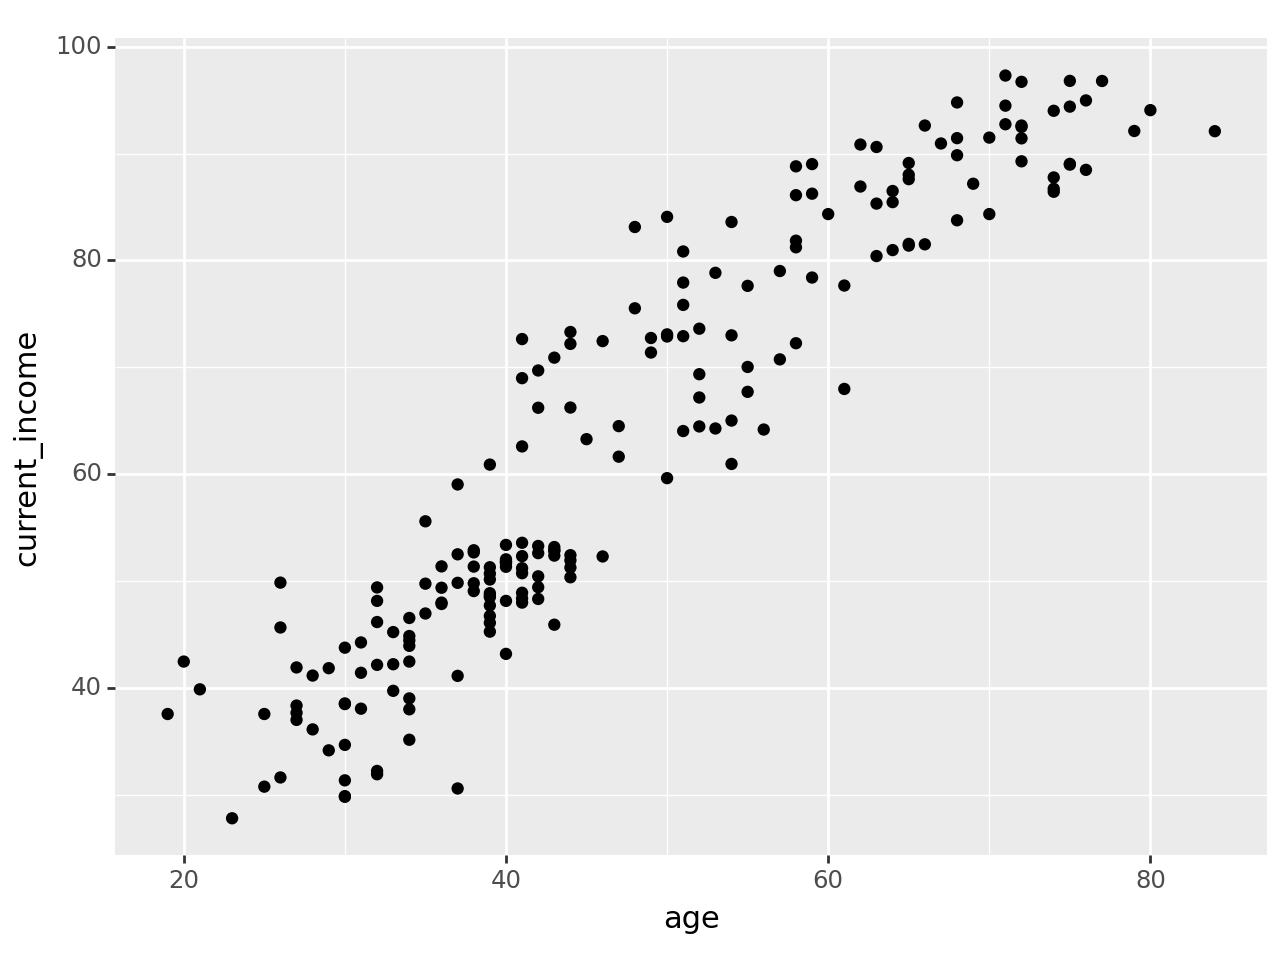

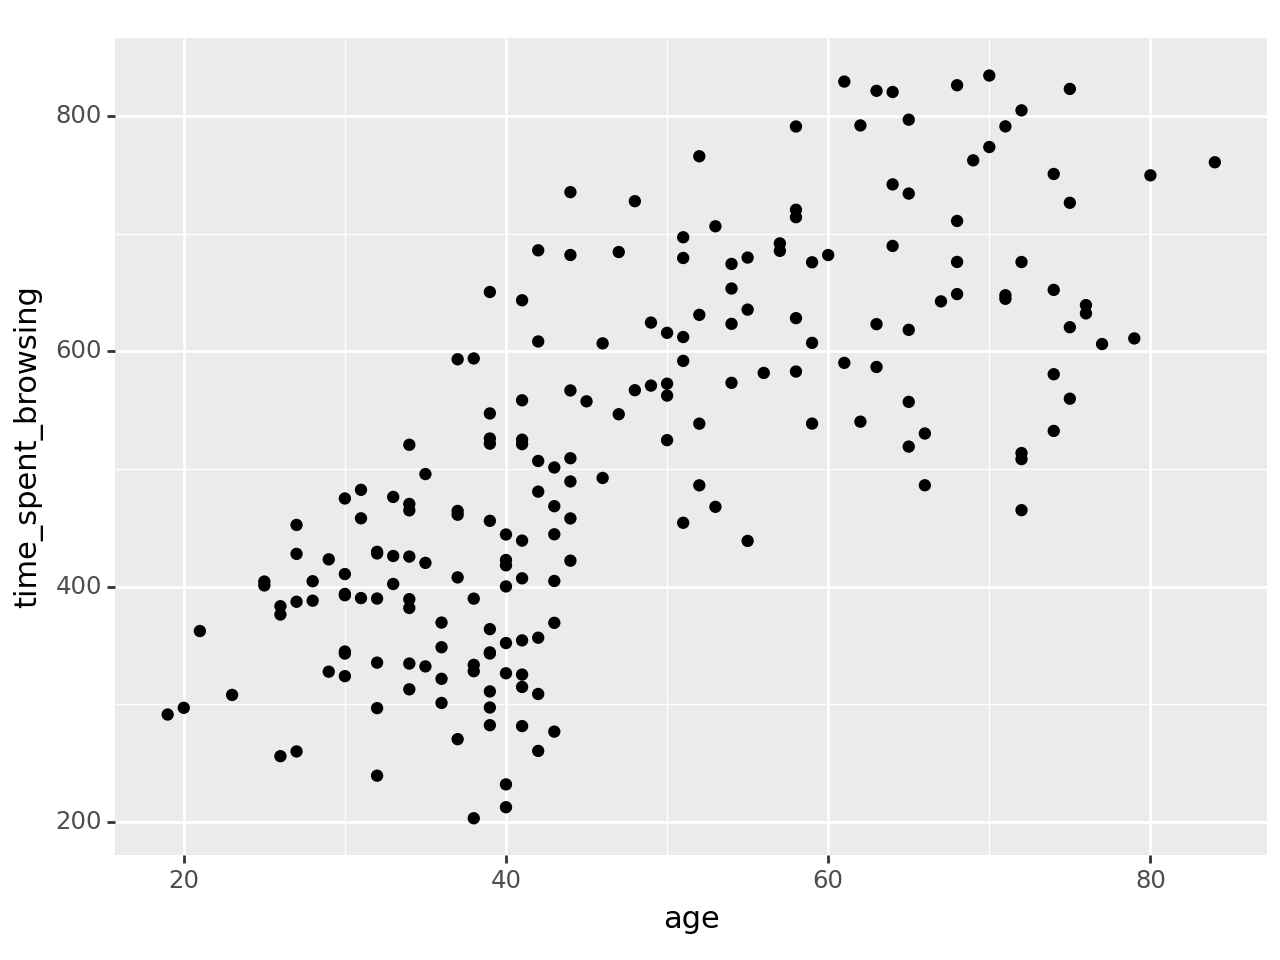

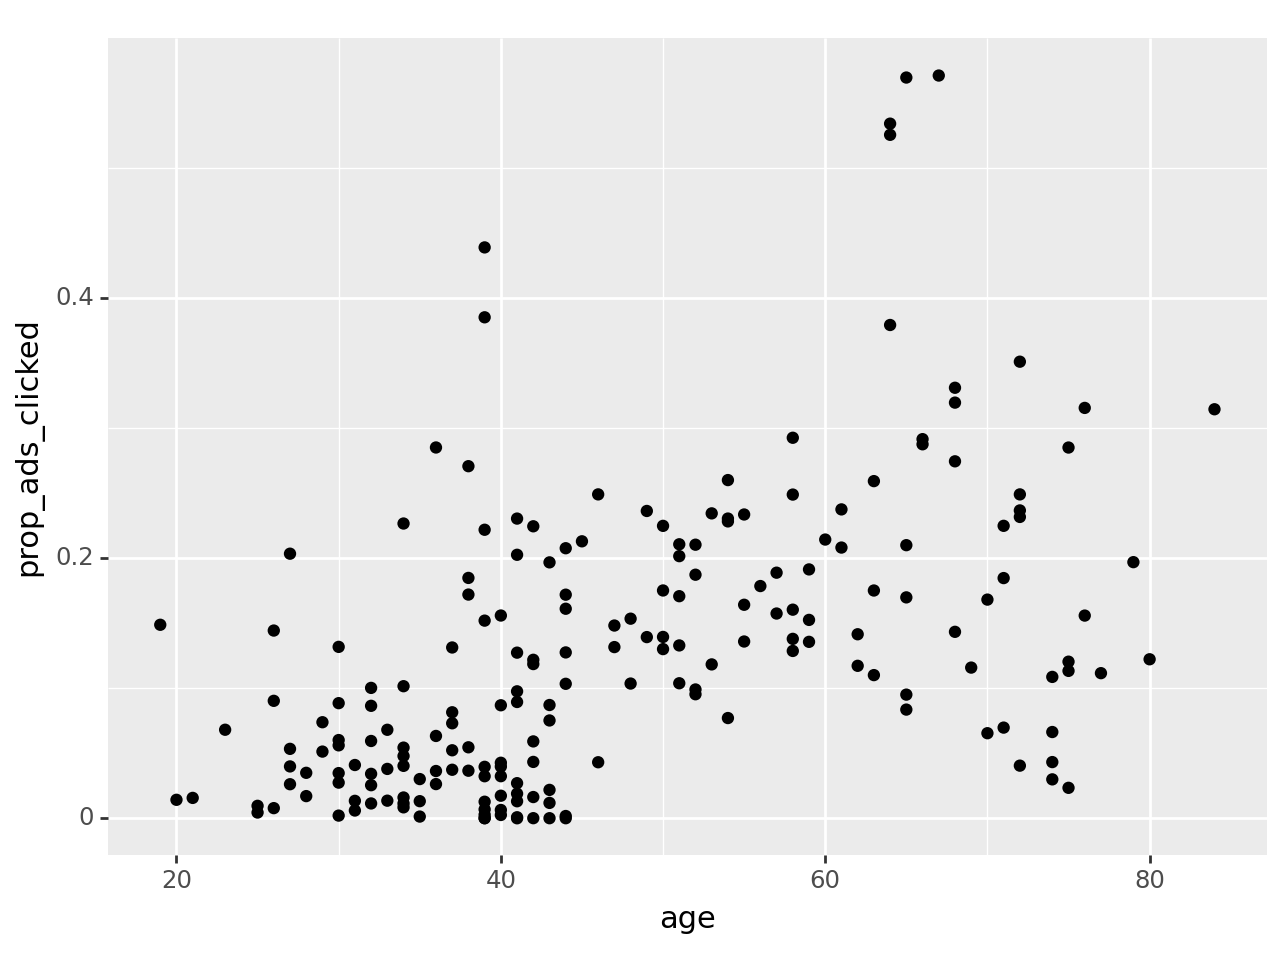

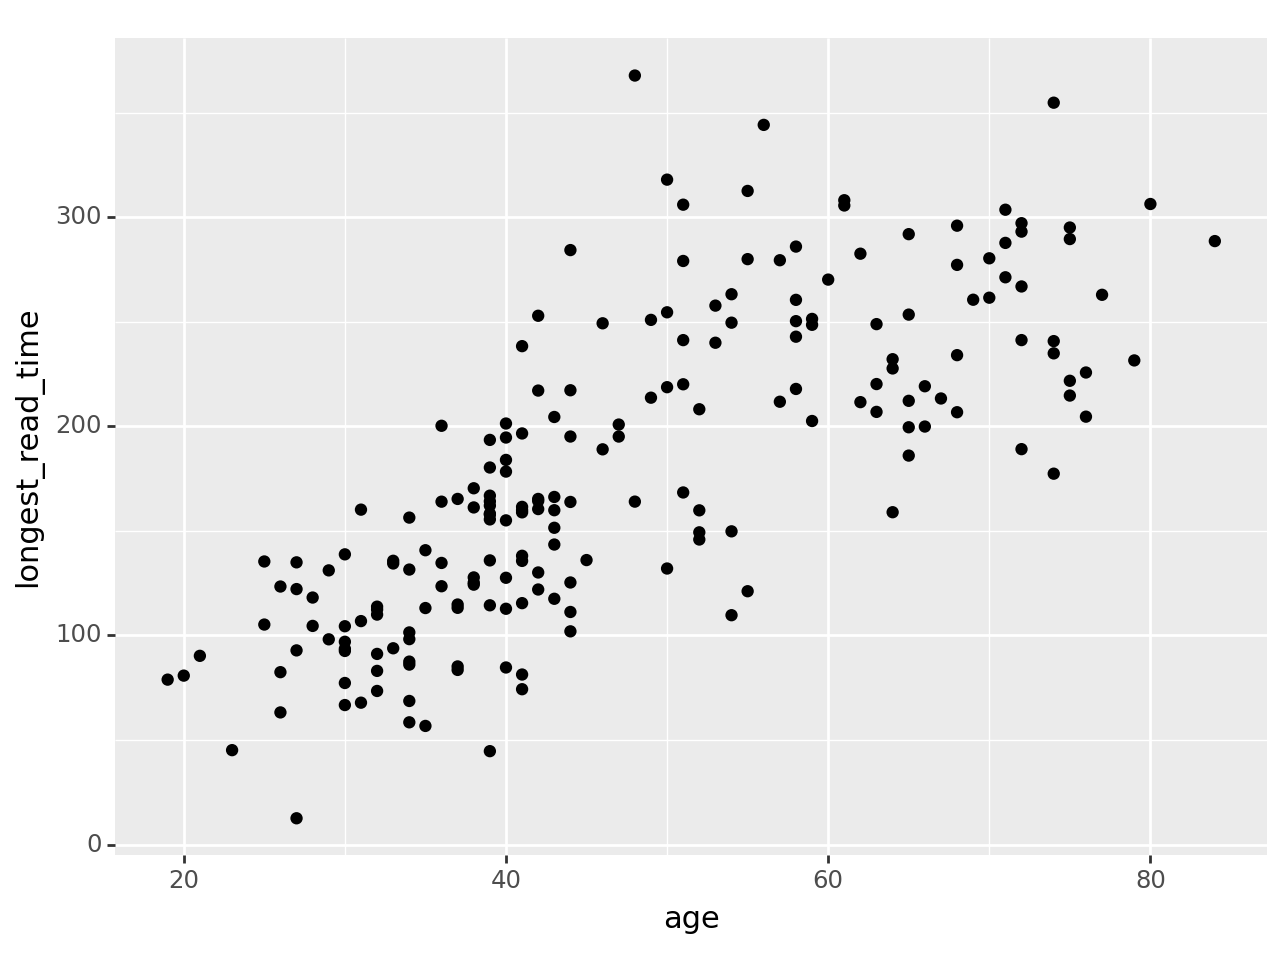

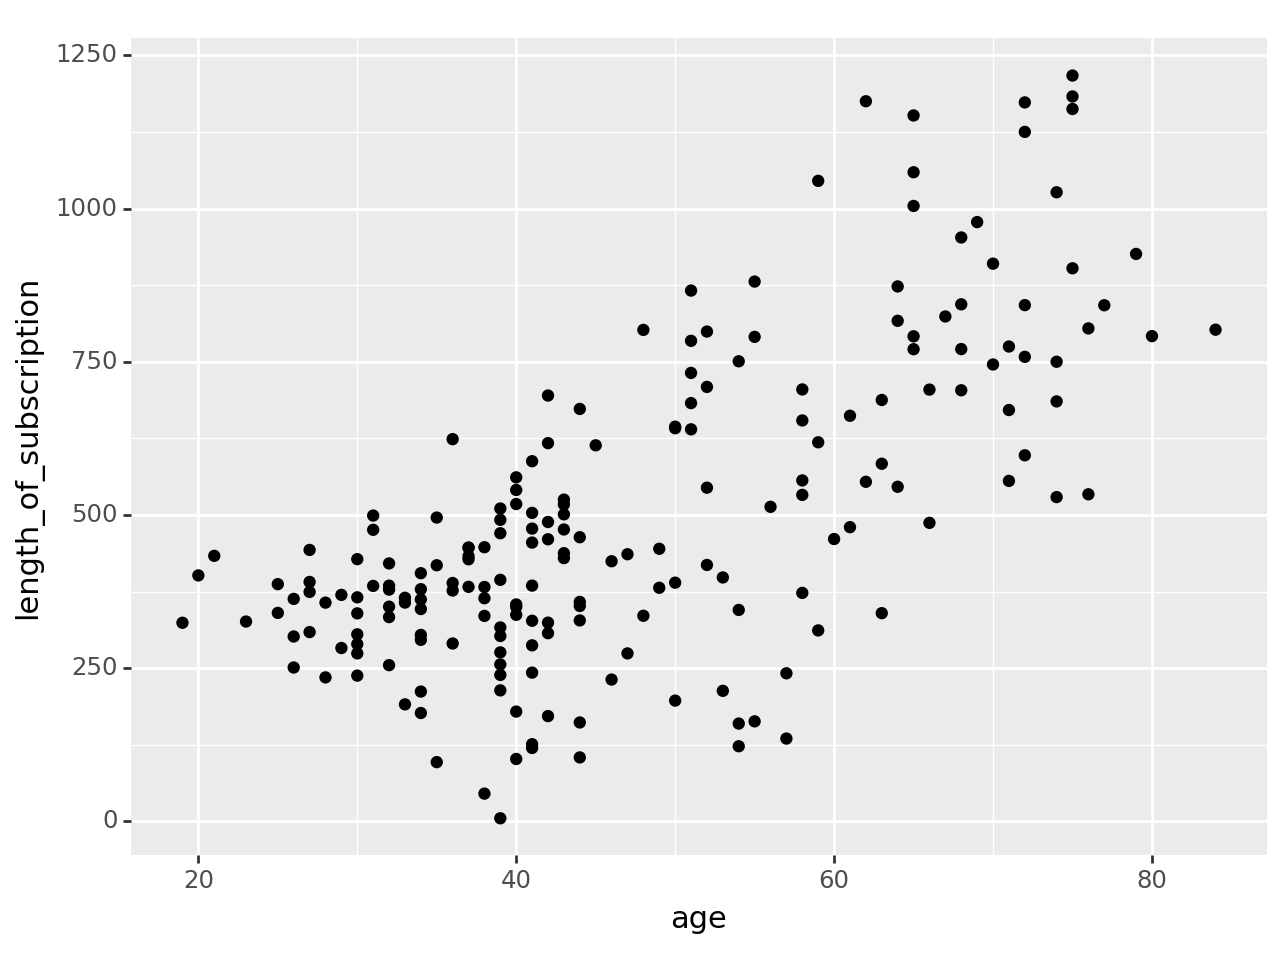

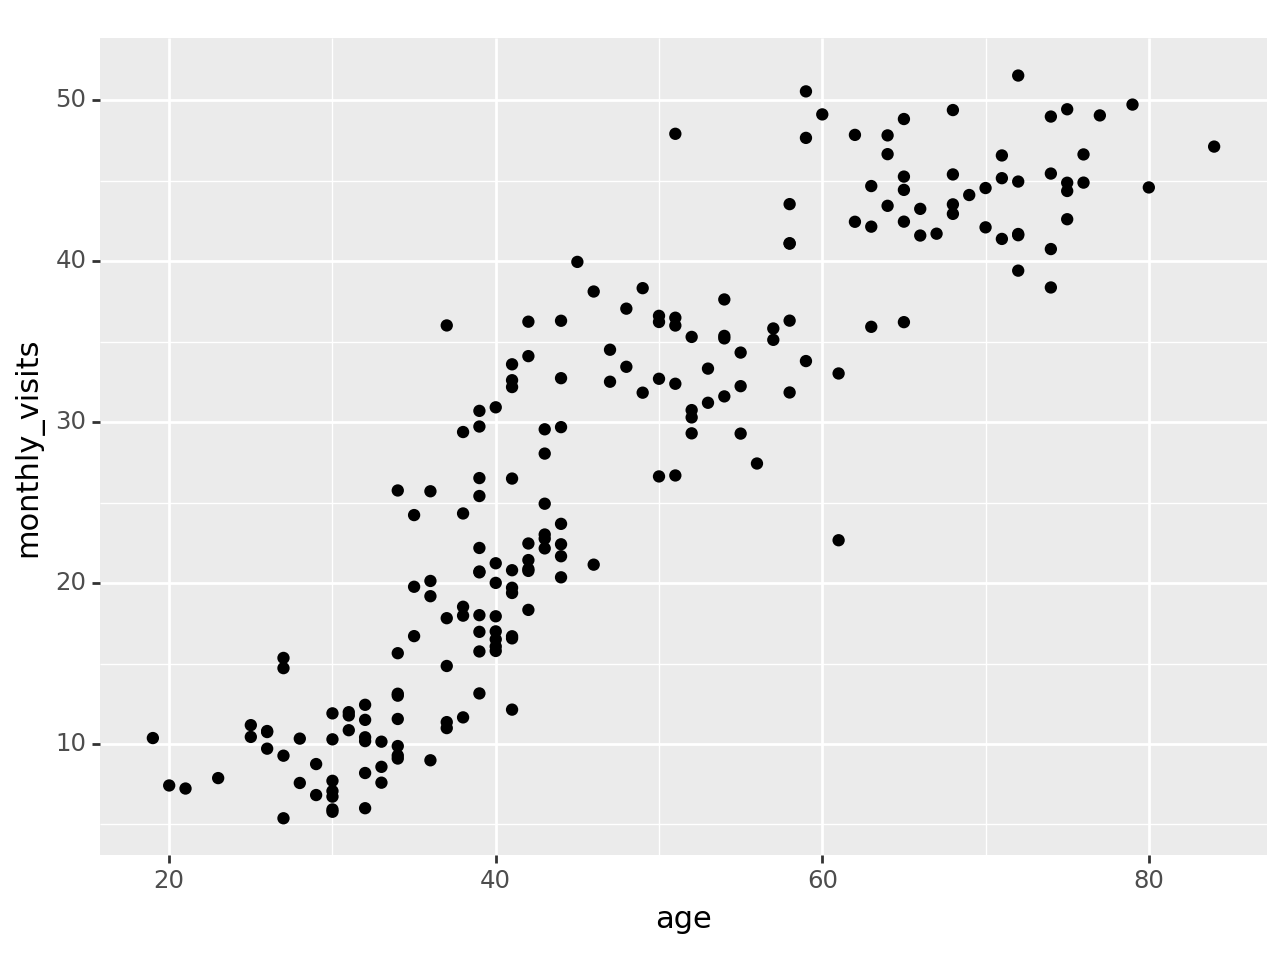

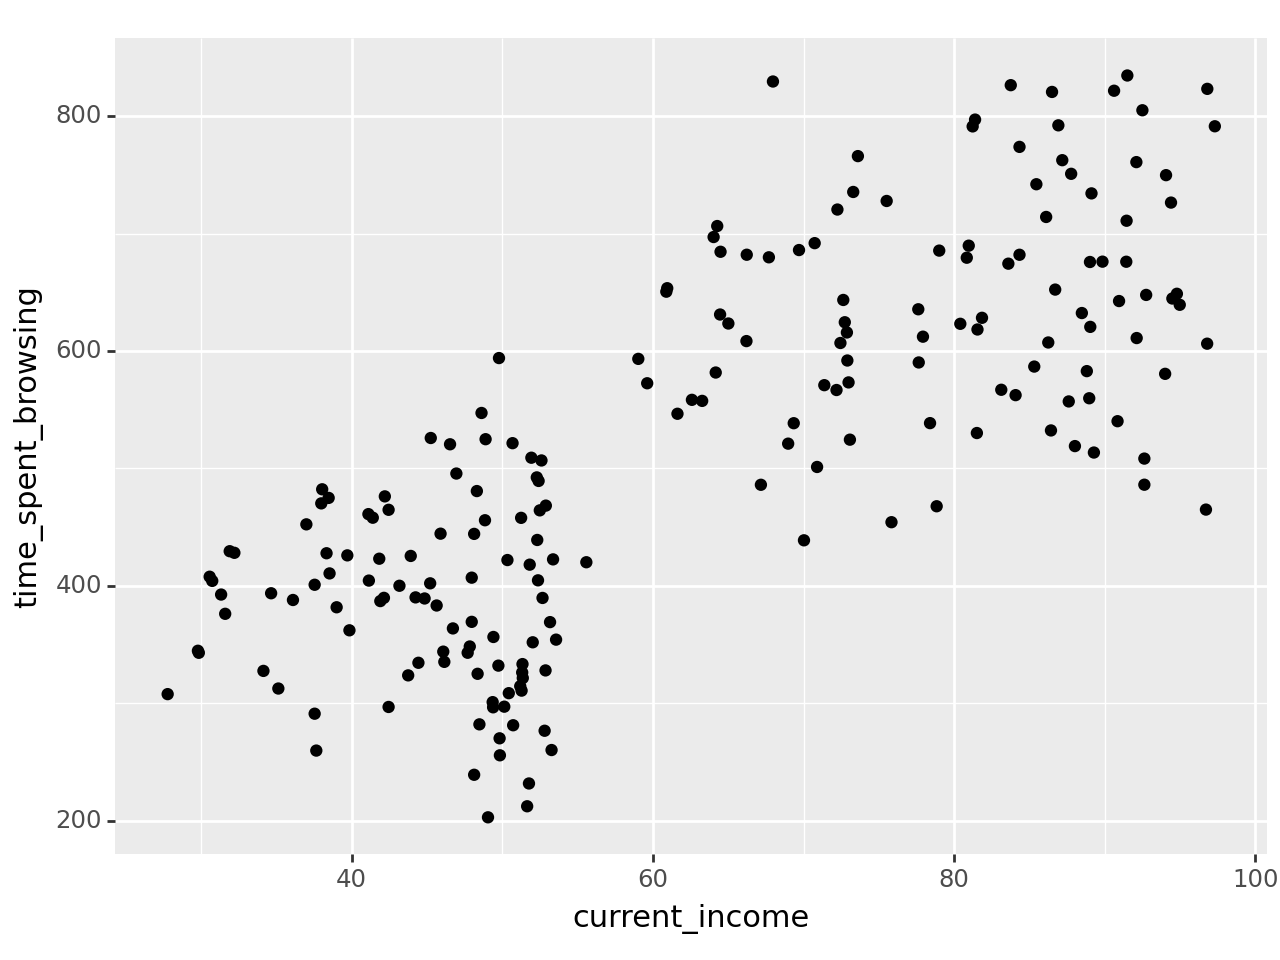

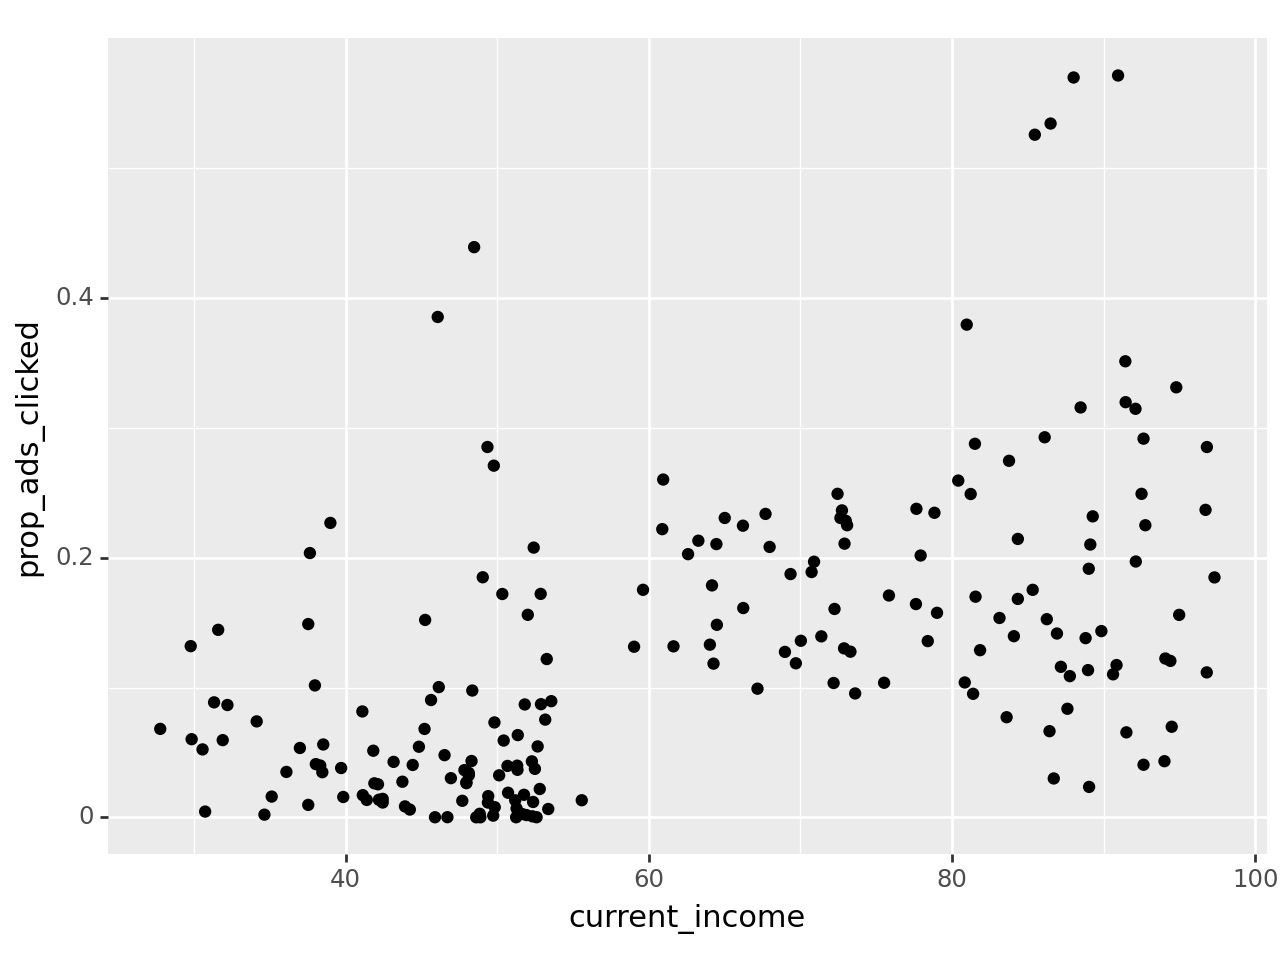

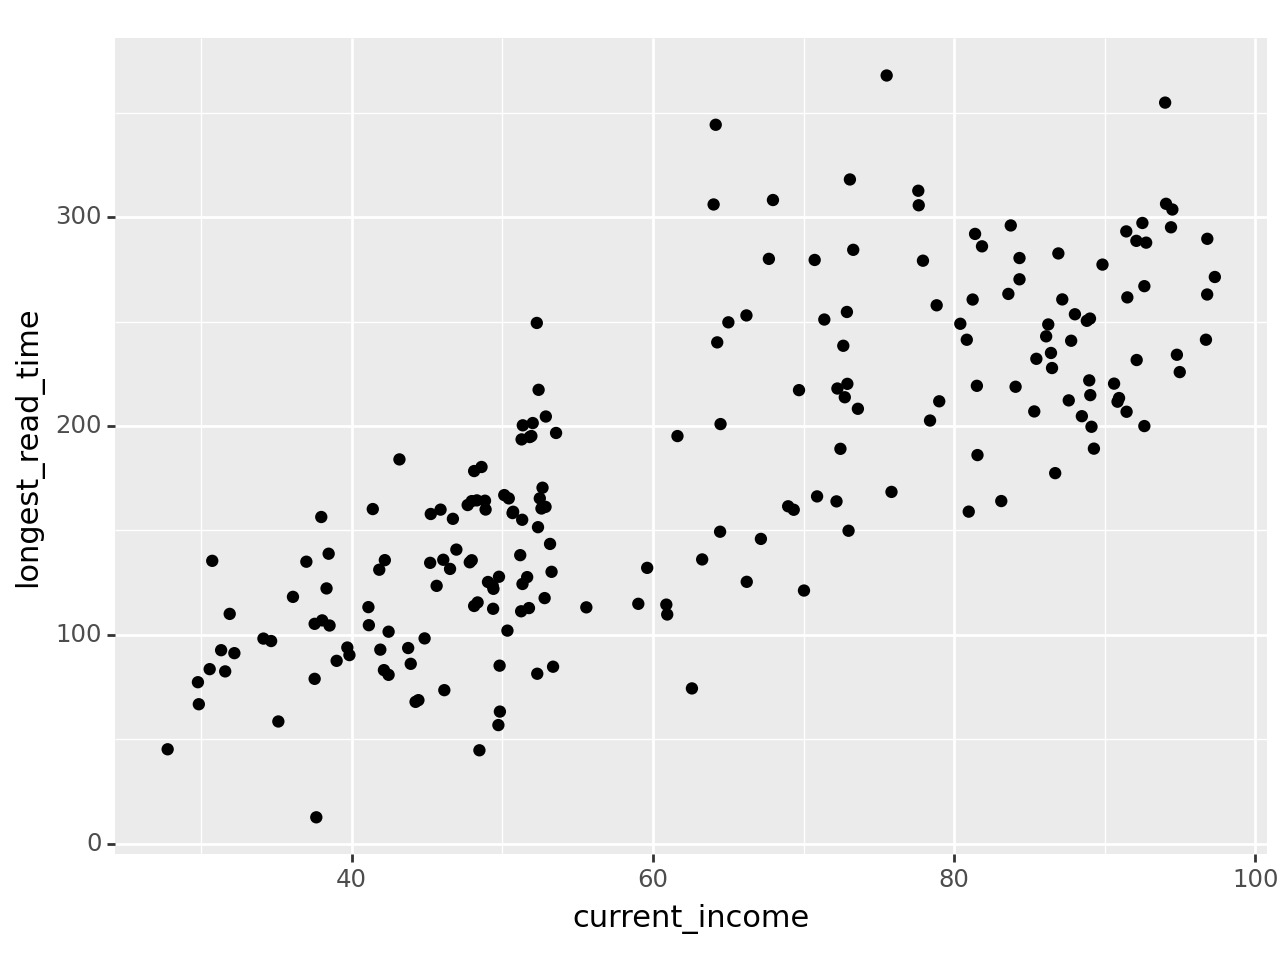

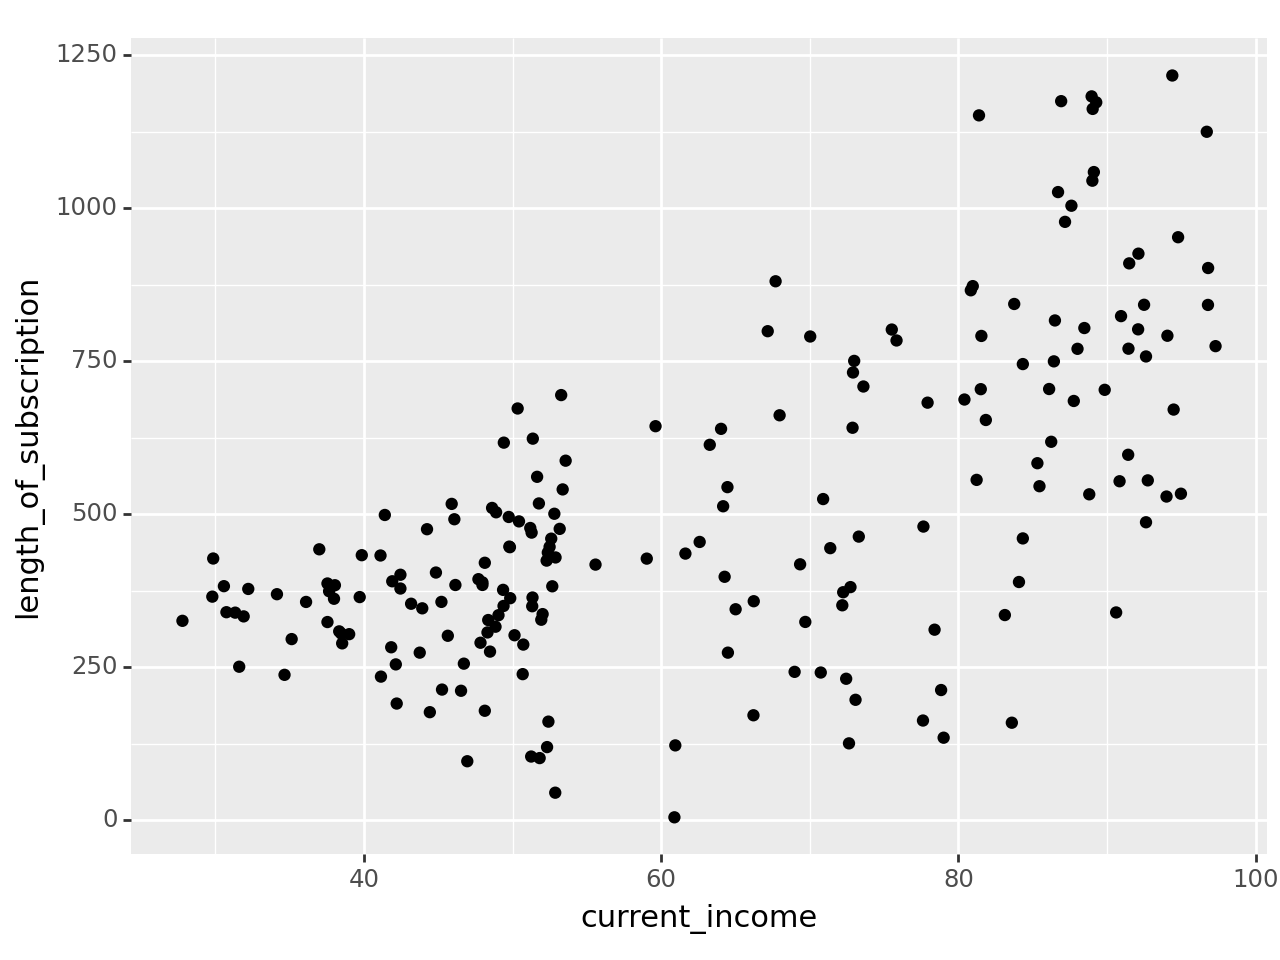

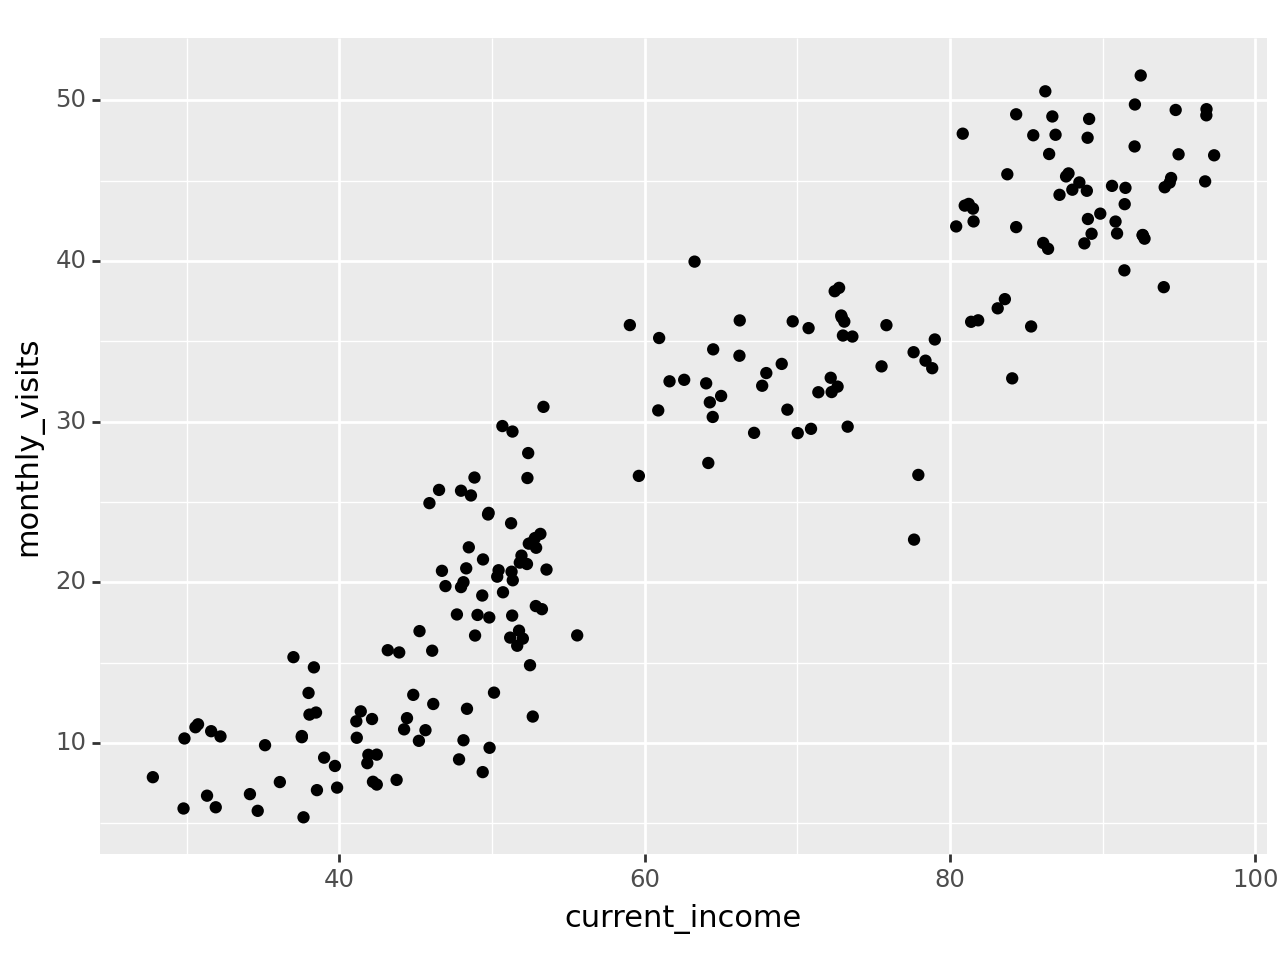

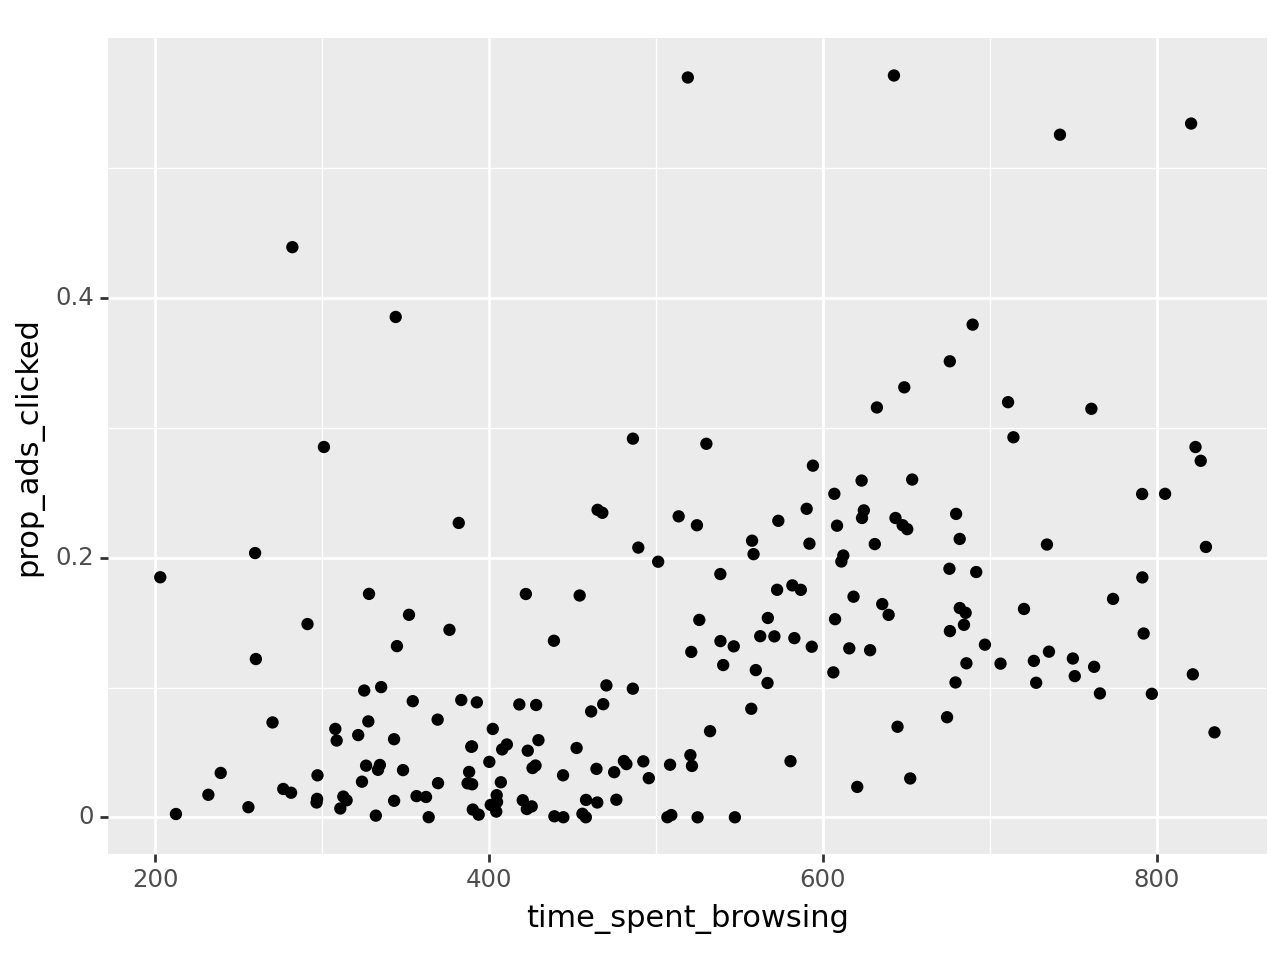

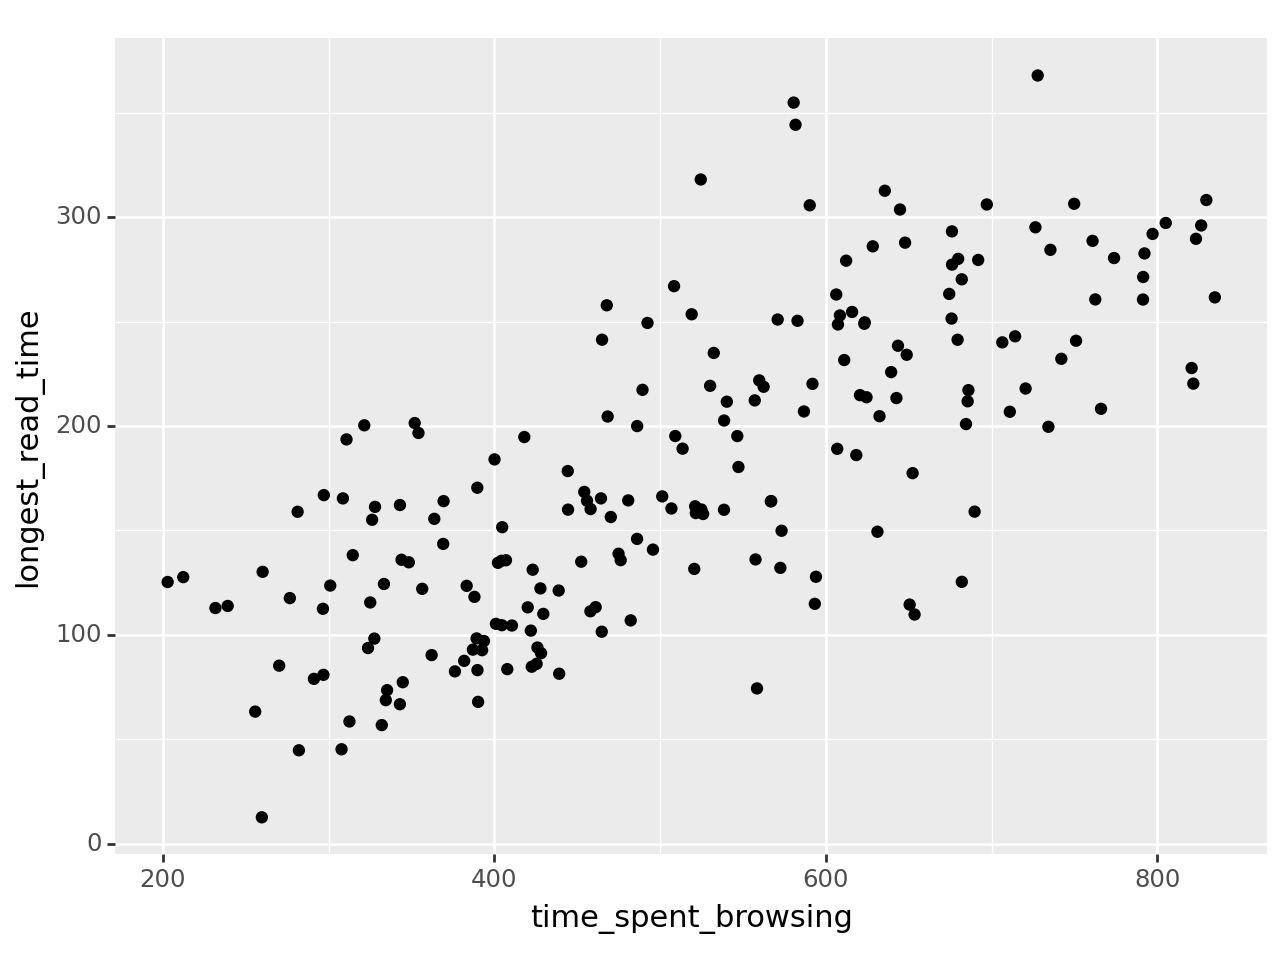

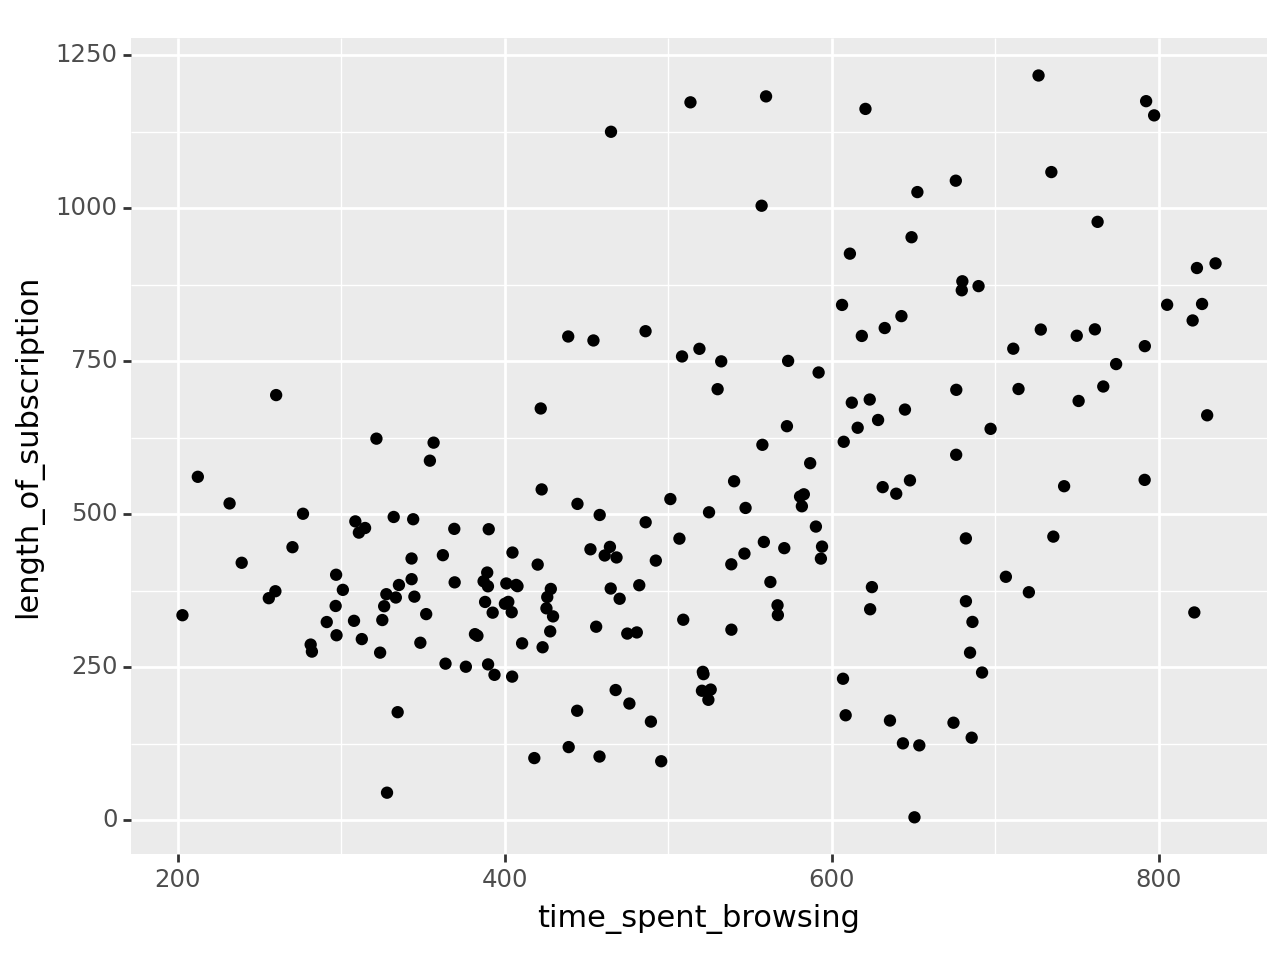

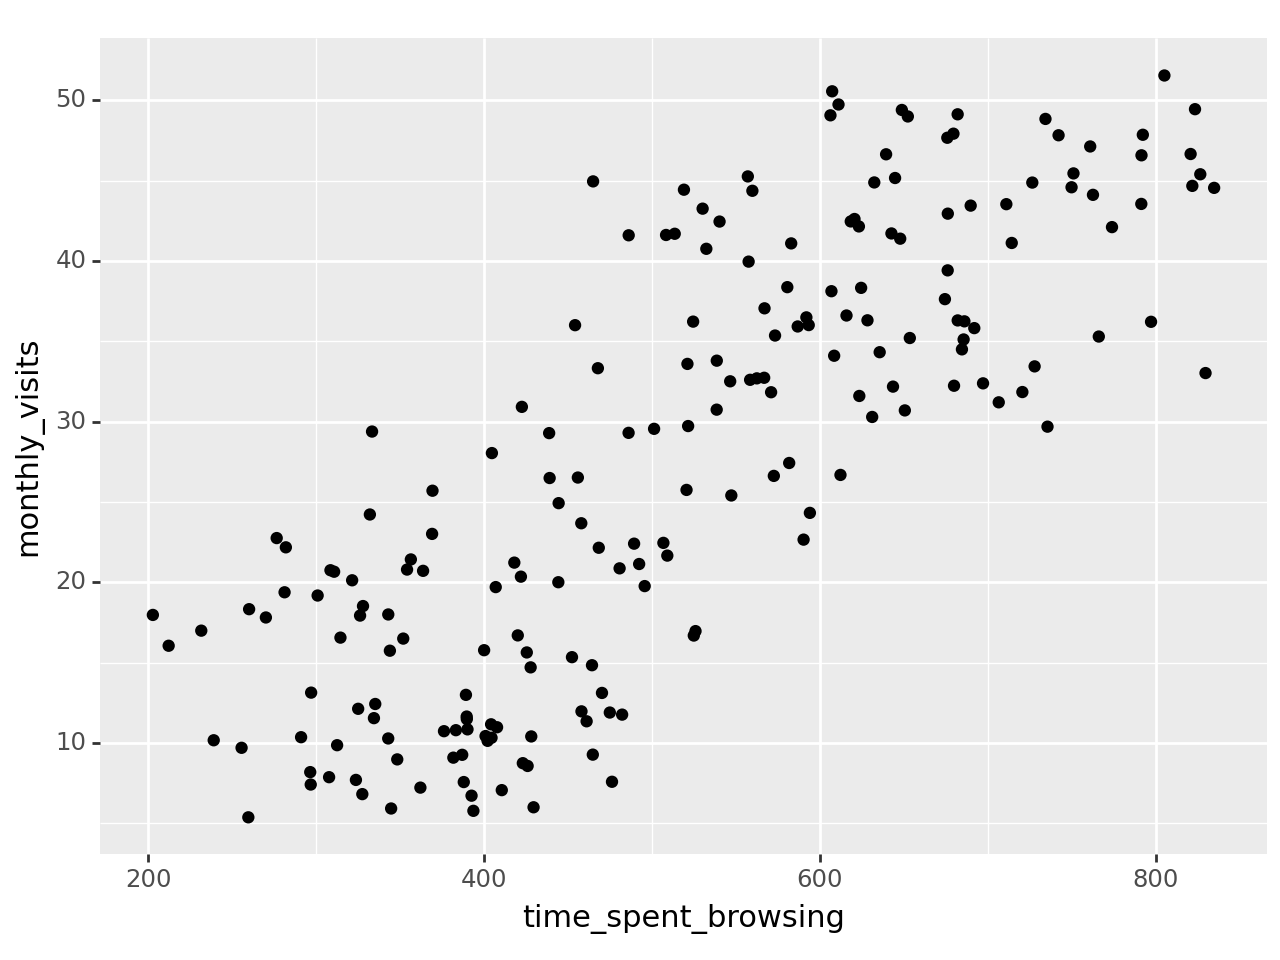

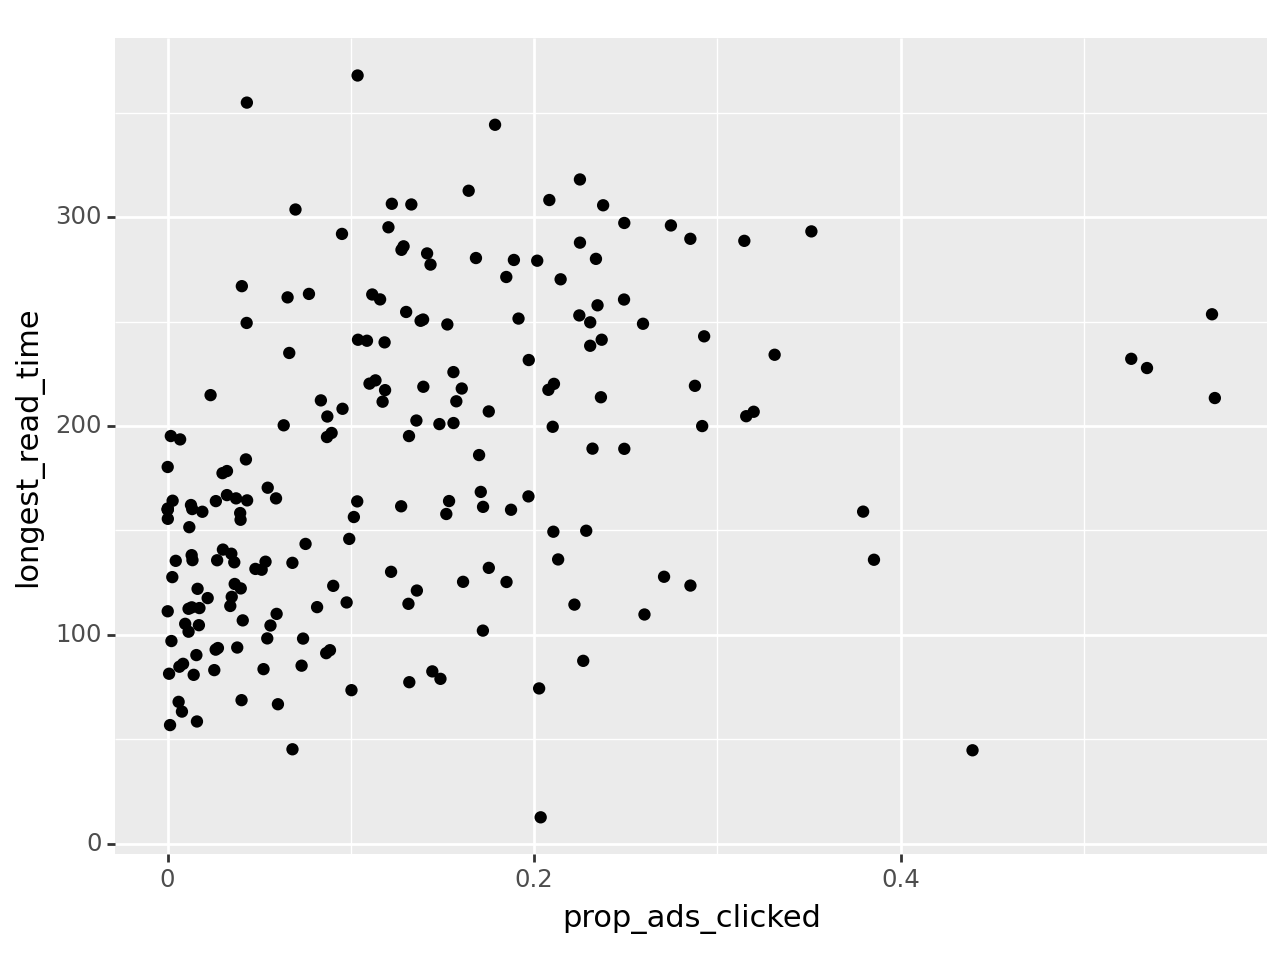

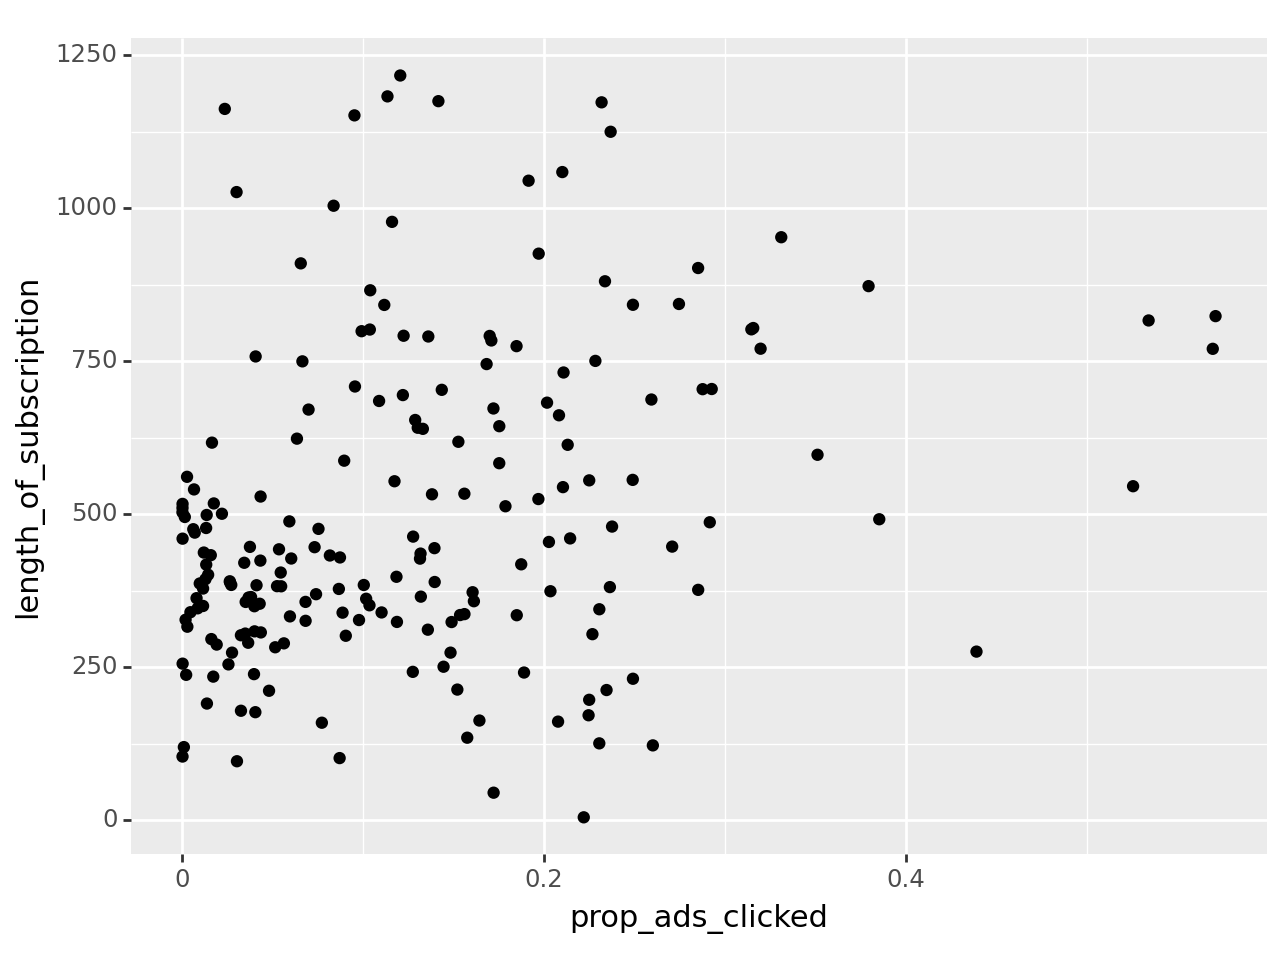

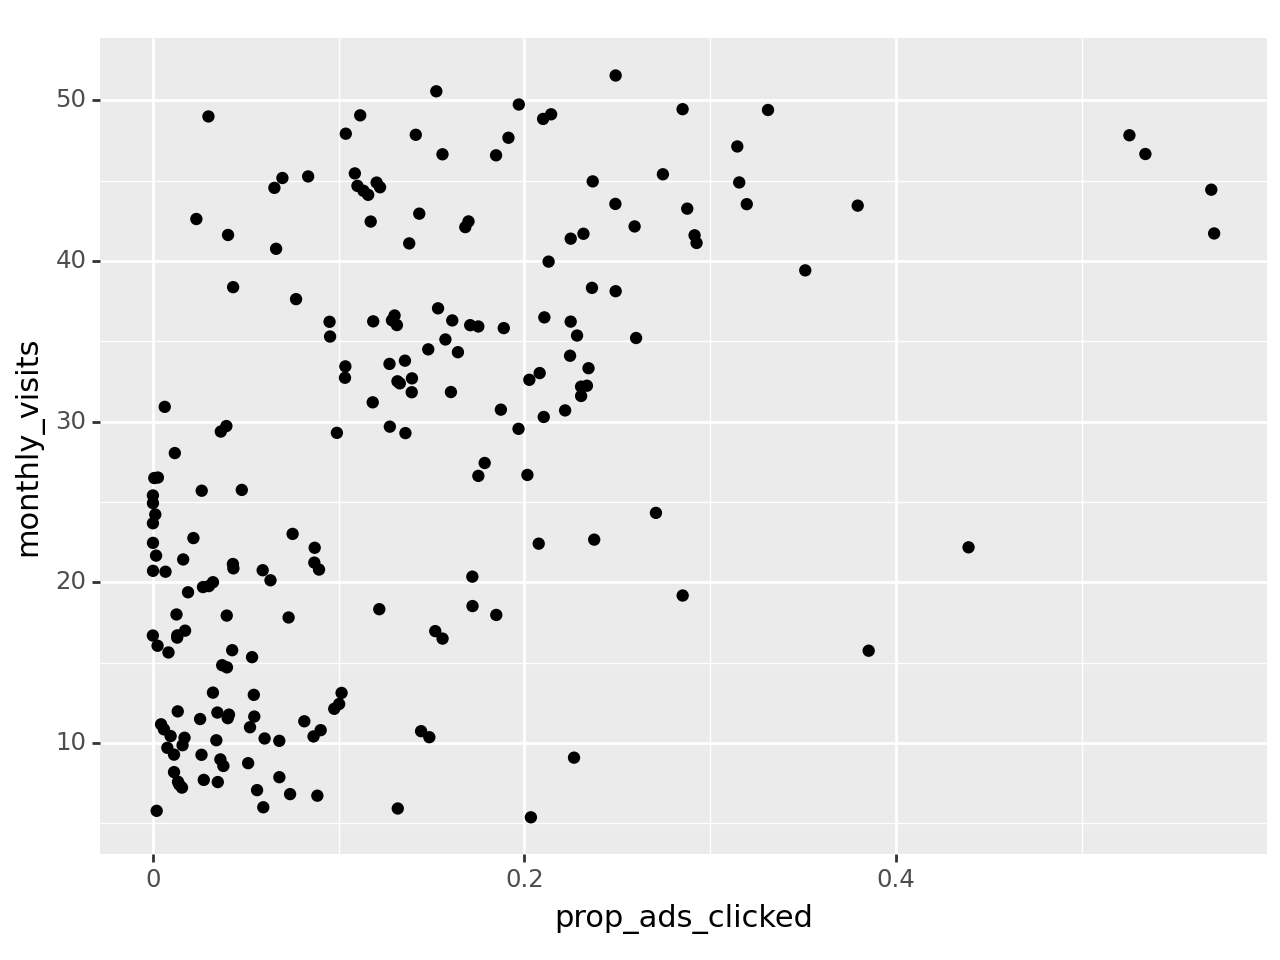

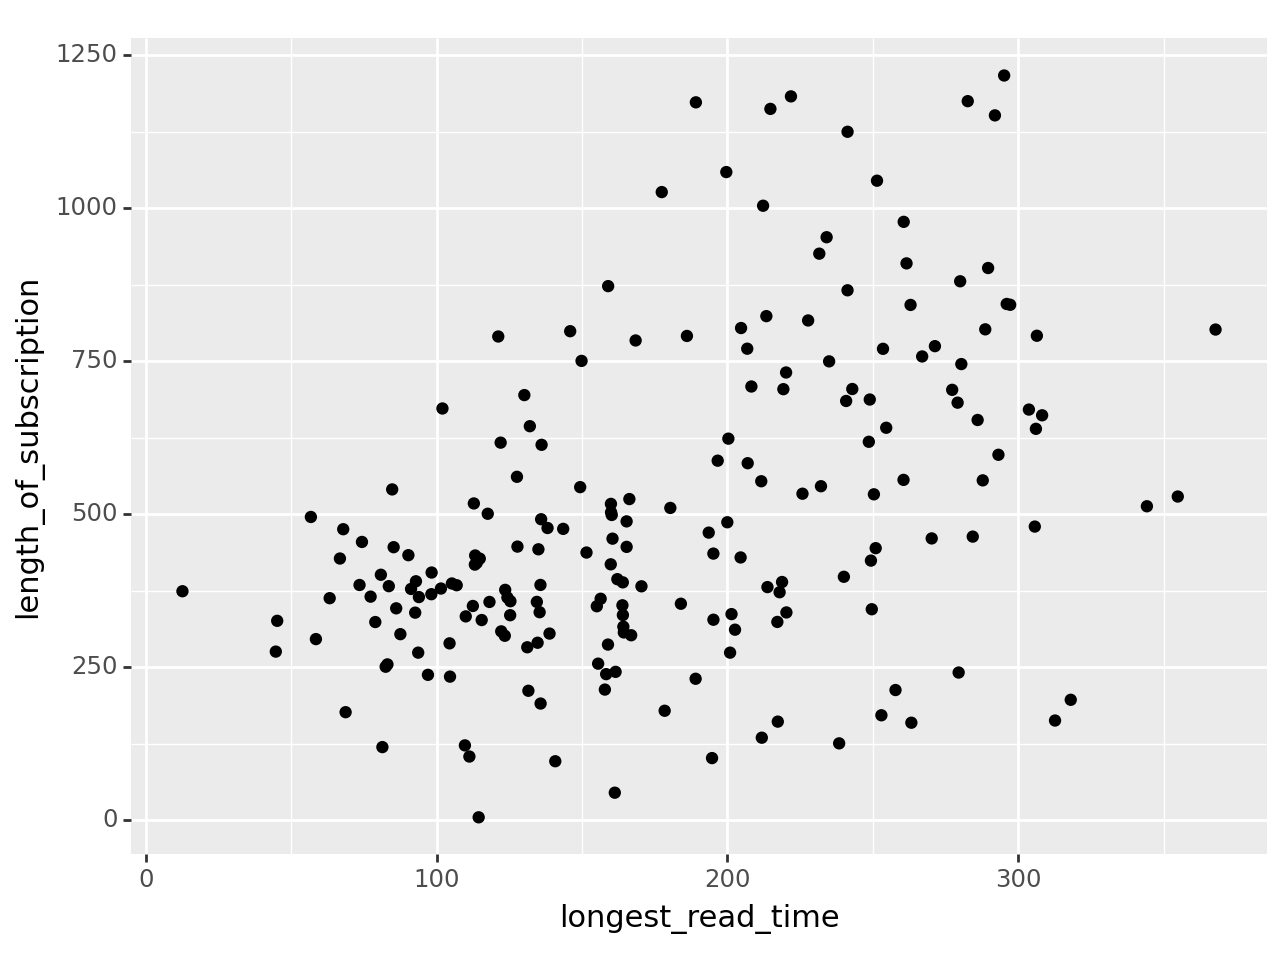

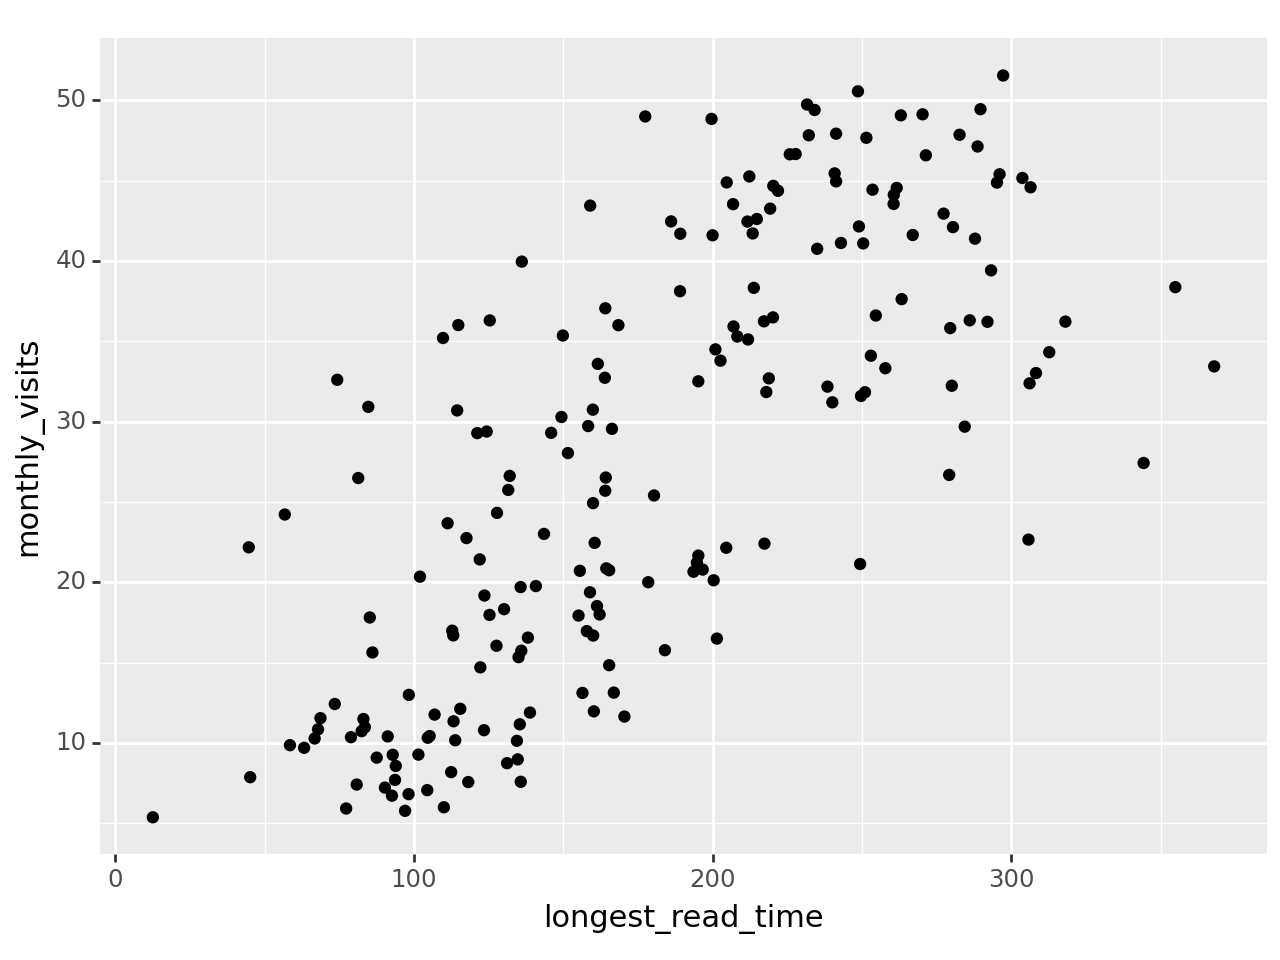

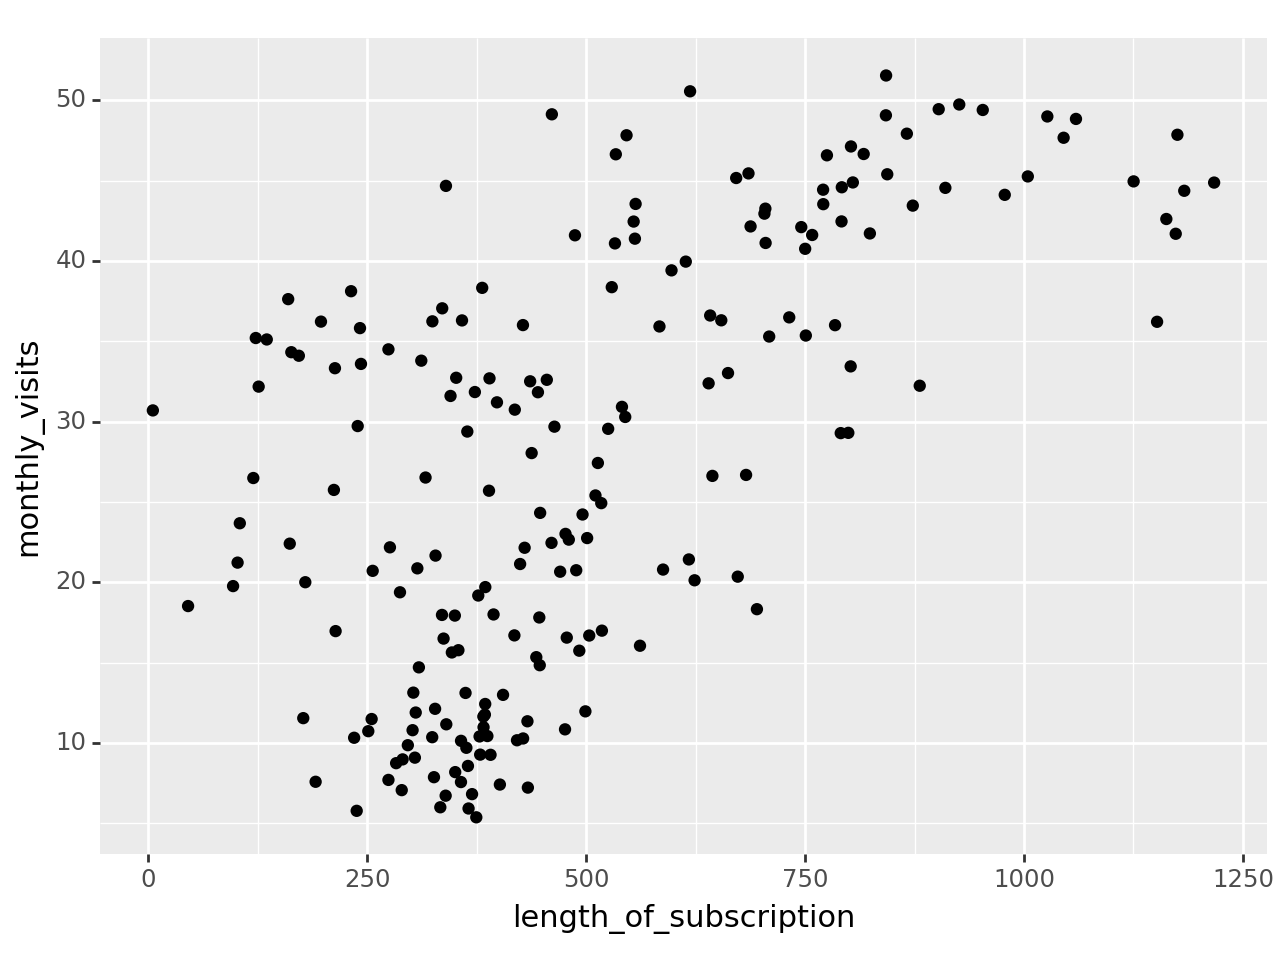

In [7]:
from plotnine import ggplot, aes, geom_point

# Check column names in the dataframe
print(behavioral_data.columns)

# Update features list to match exact column names from the dataframe
features = ['age', 'current_income', 'time_spent_browsing', 'prop_ads_clicked', 'longest_read_time', 'length_of_subscription', 'monthly_visits']

# Create scatterplots
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plot = ggplot(behavioral_data, aes(x=features[i], y=features[j])) + geom_point()
        print(plot)


In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import pandas as pd

# Load the data (assuming you've already loaded it)
# behavioral_data = pd.read_csv(behavioral_url)

# One-hot encode non-numeric columns
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(behavioral_data[['gender']])

# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['gender']))

# Concatenate the encoded features with the original DataFrame, excluding 'id'
clustering_features = pd.concat([behavioral_data.drop(['id', 'gender'], axis=1), encoded_df], axis=1)

# Z-score normalization
scaler = StandardScaler()

# Principal Component Analysis for dimensionality reduction
pca = PCA(n_components=2)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed

# Create a pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the model
pipeline.fit(clustering_features)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

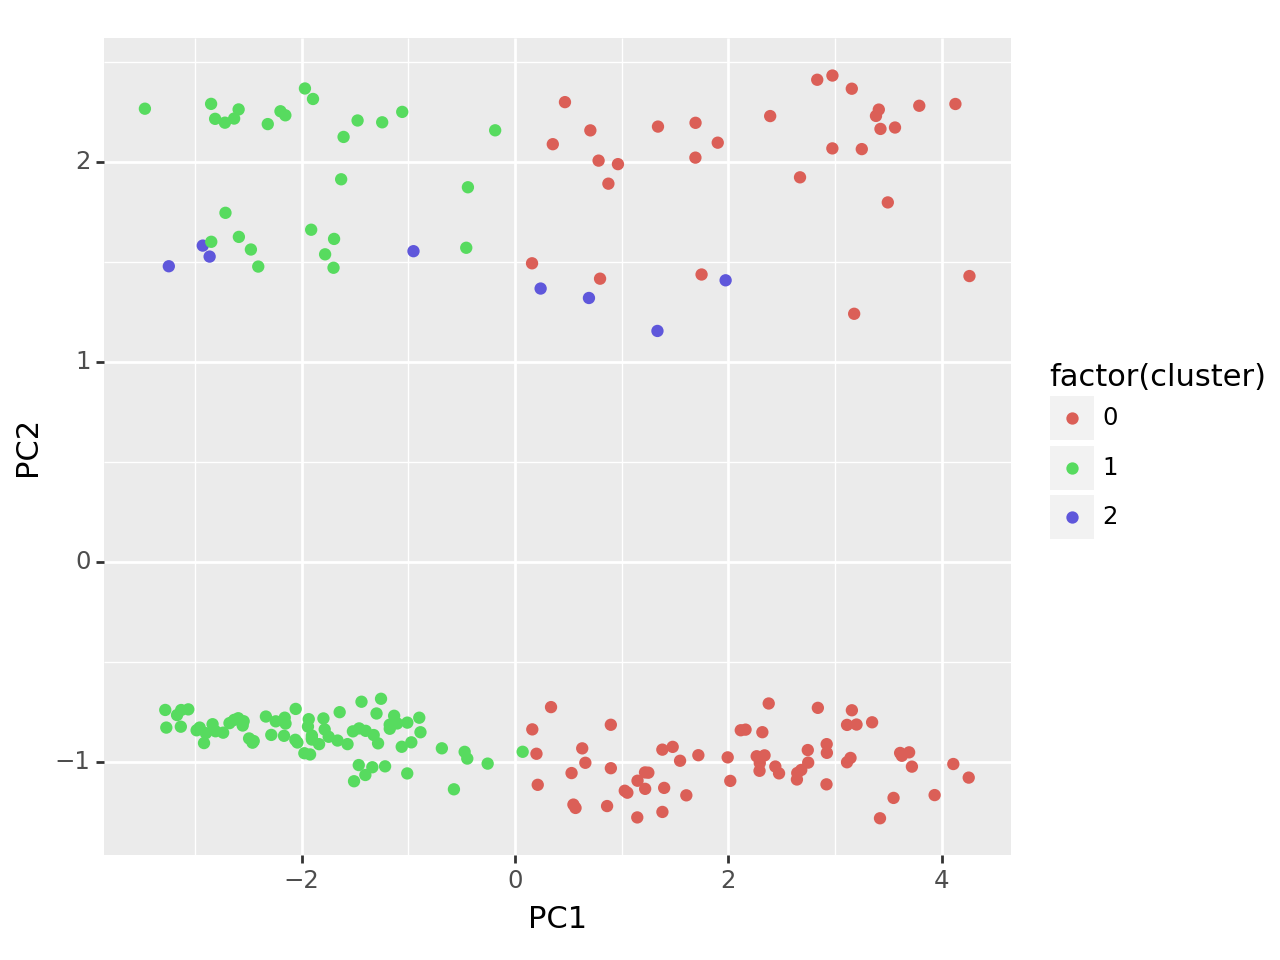

In [10]:
# Transform the data
pca_features = PCA(n_components=2).fit_transform(scaler.transform(clustering_features))

# Create a DataFrame for the PCA features and cluster labels
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['cluster'] = pipeline.named_steps['kmeans'].labels_

# Plot using plotnine
plot = ggplot(pca_df, aes(x='PC1', y='PC2', color='factor(cluster)')) + geom_point()
print(plot)


In [11]:
# Summary of customer clusters
cluster_summary = behavioral_data.copy()
cluster_summary['cluster'] = pipeline.named_steps['kmeans'].labels_
summary_table = cluster_summary.groupby('cluster').mean()
print(summary_table)


               age  current_income  time_spent_browsing  \
cluster                                                   
0        60.901099       81.555275           646.193187   
1        35.811881       46.318911           394.823460   
2        41.000000       55.626250           513.814674   

         length_of_subscription  monthly_visits  longest_read_time  \
cluster                                                              
0                    654.945821       39.739344         237.137871   
1                    363.529729       16.598252         126.431874   
2                    432.902074       23.547361         177.228385   

         prop_ads_clicked          id  
cluster                                
0                0.193677  102.989011  
1                0.069296   99.871287  
2                0.116695   80.125000  


<ipython-input-11-1049cd5de21f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## 2. Article Clustering
- Using an `sklearn` `Pipeline`, build and fit a **Hierarchical Clustering** model using all the variables *except* `id`. Use cosine similarity as your distance metric (also called `affinity`) and `average` linkage.
- Do **not** z-score, as these are counts.
- Create a dendrogram and in the **Methods** section of your report, explain **what number** of cluster you decided to use and **why**.
- In the **Results** section, discuss the performance of the model based on the dendrogram.
- Create at least one other summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail what kind of customers are in each cluster, and how that information might help the company.


In [13]:
import pandas as pd

# Load the article data
article_url = "https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/HW3_topics.csv"
article_data = pd.read_csv(article_url)


In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Drop 'id' column
article_data_clustering = article_data.drop('id', axis=1)

# Compute cosine similarity
cosine_similarity_matrix = cosine_similarity(article_data_clustering)

# Convert to distance matrix (1 - cosine similarity)
distance_matrix = 1 - cosine_similarity_matrix

# Correcting the diagonal to be zero
np.fill_diagonal(distance_matrix, 0)

# Hierarchical Clustering using average linkage and cosine distance
clustering = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=None, distance_threshold=0)
clustering.fit(distance_matrix)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead


AgglomerativeClustering(affinity='precomputed', distance_threshold=0,
                        linkage='average', n_clusters=None)

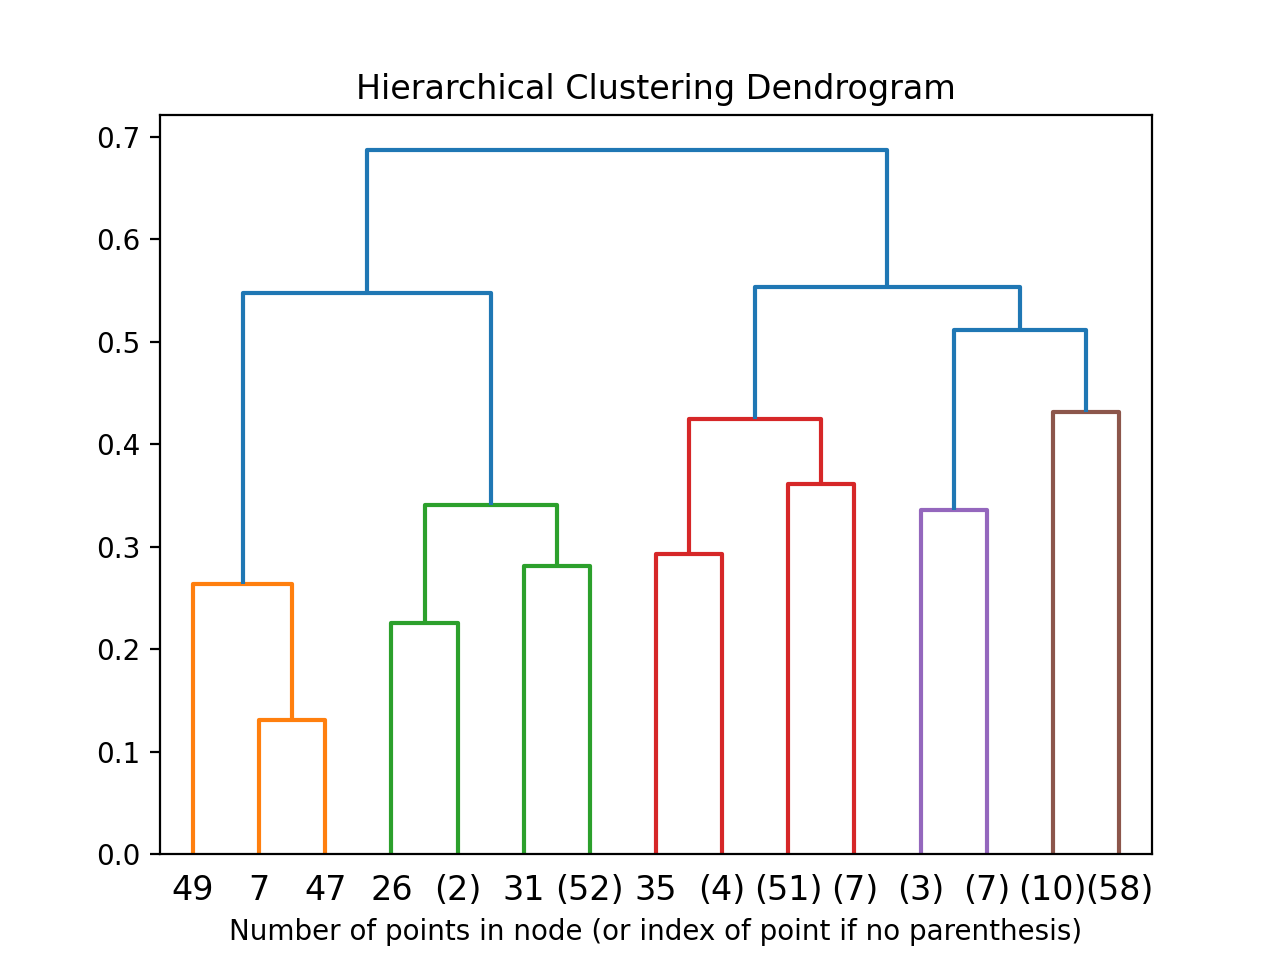

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Function to plot the dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix
    # The linkage_matrix is created using the distances from the model
    linkage_matrix = linkage(squareform(distance_matrix), method='average')

    # Plot the dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, truncate_mode='level', p=3)  # Adjust 'p' for truncation
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()


In [22]:
# Assuming you have decided on a number of clusters, refit the model
n_clusters = 5  # Replace with the number of clusters you've chosen
final_clustering = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=n_clusters)
article_data['cluster'] = final_clustering.fit_predict(distance_matrix)

# Summary table
summary_table = article_data.groupby('cluster').mean()
print(summary_table)


           Stocks  Productivity    Fashion  Celebrity  Cryptocurrency  \
cluster                                                                 
0        9.544118     11.191176   2.308824   0.529412        2.500000   
1        1.910714      2.767857  12.607143  17.250000        1.517857   
2        4.253968      3.888889   3.682540   3.539683        5.063492   
3        5.000000      5.000000   1.000000   5.333333       12.666667   
4        1.700000      2.500000   6.400000   2.800000        1.300000   

           Science  Technology   SelfHelp    Fitness         AI          id  
cluster                                                                      
0         3.867647    2.279412  15.044118   6.426471   7.794118  101.529412  
1         2.000000    2.517857   2.892857   1.607143   1.928571   99.464286  
2        15.984127   19.920635   2.809524   3.730159  24.206349  102.158730  
3         1.000000    3.333333   1.666667   1.000000   1.333333   94.000000  
4         6.800000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



## 3. Report

[QUARTO TEMPLATE HERE](https://github.com/ywen2021/CPSC392/blob/main/Homework4Template.qmd)

[DOCS TEMPLATE HERE](https://docs.google.com/document/d/17xUT9y-ZvPKFCeYkrSDq8wCRJt_XCeYg0hgnZIujA5k/edit?usp=sharing)

Your Technical Report is a way to practice presenting and formatting your results like you would in industry. Make sure your report and **plots** are clear, and explain things clearly. Write a report that has the following sections:

1. **Introduction**: description of the problem (e.g. what are you predicting? what variables do you have available? How might this model be useful if you are successful). You should end with a sentence or two about what the impact of these models could be.

2. **Methods**: describe your models in detail (as if explaining them to the CEO of the media company), as well as any pre-processing you had to do to the data.

3. **Results**: How did your models perform? Describe the clusters from your Behavioral Clustering models. Were they different? If so, how? What could the CEO of the media company do with these clusters? Describe the clusters form your Article Clustering model. What could the CEO of the media company do with these clusters?

4. **Discussion/Reflection**: A few sentences about what you learned from performing these analyses, and at least one suggestion for what you'd add or do differently if you were to perform this analysis again in the future.